# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [55]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [3]:
#cities=['Chicago','Detroit']
cities

['blackmans bay',
 'iskateley',
 'kingston',
 'pechory',
 'nuuk',
 'kodiak',
 'ilulissat',
 'kiunga',
 'waitangi',
 'severo-yeniseyskiy',
 'port mathurin',
 'arkalyk',
 'ar ruways',
 'san julian',
 'taiohae',
 'dudinka',
 'iqaluit',
 'adamstown',
 'malango',
 'remire-montjoly',
 'bronderslev',
 'port-aux-francais',
 'udachny',
 'puerto baquerizo moreno',
 'edinburgh of the seven seas',
 'bethel',
 'haicheng',
 'morrope',
 'crane',
 'port lincoln',
 'puerto lempira',
 'bilibino',
 'sosnovo-ozerskoye',
 'margaret river',
 'northam',
 'papatowai',
 'three points',
 'bredasdorp',
 'bodo',
 'tual',
 'hithadhoo',
 'fuvahmulah',
 'albany',
 'sinop',
 'greenville',
 'saipan',
 'carutapera',
 'alappuzha',
 'ribeira grande',
 'karamay',
 'susuman',
 'kourou',
 'visby',
 'muragacha',
 'aldinga beach',
 'grytviken',
 'christchurch',
 'novyy urgal',
 'smithers',
 'lautoka',
 'bethanie',
 'kabompo',
 'carnarvon',
 'yellowknife',
 'hawaiian paradise park',
 'port elizabeth',
 'weno',
 'georgetown',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [114]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | kingston
Processing Record 4 of Set 1 | pechory
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | kiunga
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | severo-yeniseyskiy
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | arkalyk
Processing Record 13 of Set 1 | ar ruways
Processing Record 14 of Set 1 | san julian
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | malango
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | bronderslev
Processing Record 22 of Set 1 | port-a

In [115]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [116]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,16.07,64,40,2.61,AU,1682507483
1,iskateley,67.6803,53.1512,-0.21,88,7,4.64,RU,1682507483
2,kingston,17.9970,-76.7936,23.47,88,25,1.03,JM,1682507318
3,pechory,57.8164,27.6119,20.70,44,33,4.84,RU,1682507484
4,nuuk,64.1835,-51.7216,0.34,100,100,5.66,GL,1682507484


In [117]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [118]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,16.07,64,40,2.61,AU,1682507483
1,iskateley,67.6803,53.1512,-0.21,88,7,4.64,RU,1682507483
2,kingston,17.9970,-76.7936,23.47,88,25,1.03,JM,1682507318
3,pechory,57.8164,27.6119,20.70,44,33,4.84,RU,1682507484
4,nuuk,64.1835,-51.7216,0.34,100,100,5.66,GL,1682507484


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

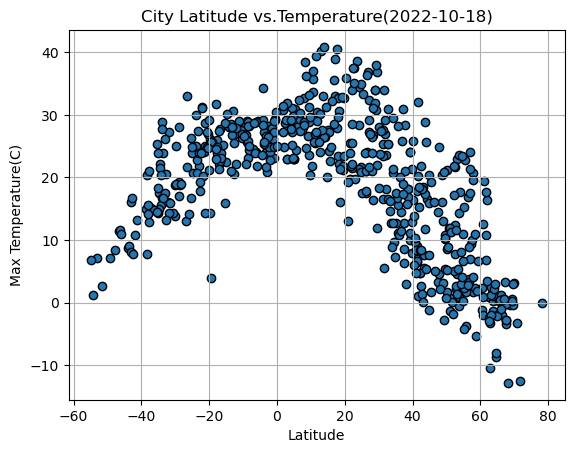

In [119]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

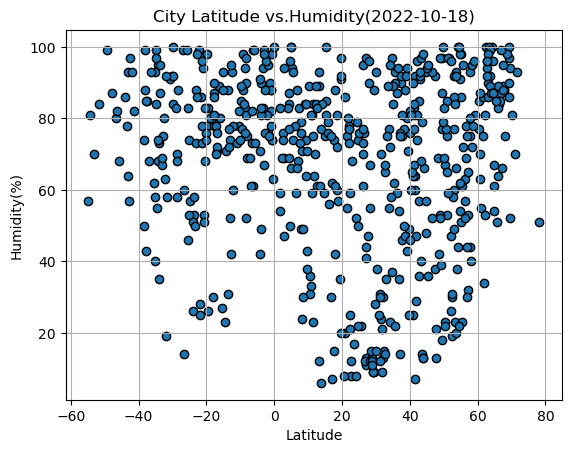

In [120]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

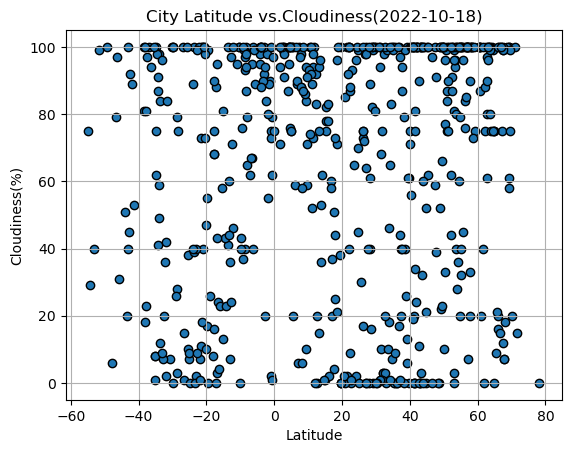

In [121]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

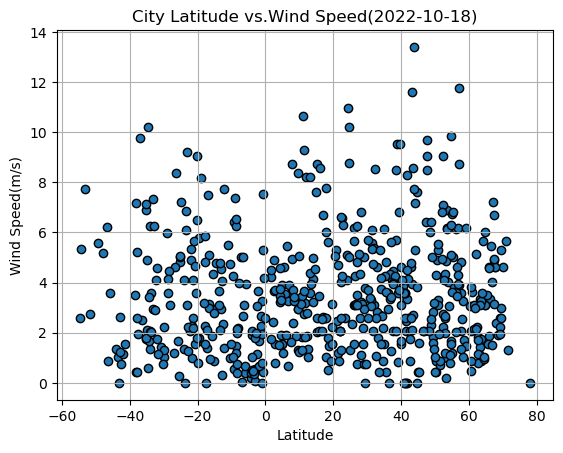

In [122]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [142]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [124]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iskateley,67.6803,53.1512,-0.21,88,7,4.64,RU,1682507483
2,kingston,17.9970,-76.7936,23.47,88,25,1.03,JM,1682507318
3,pechory,57.8164,27.6119,20.70,44,33,4.84,RU,1682507484
4,nuuk,64.1835,-51.7216,0.34,100,100,5.66,GL,1682507484
5,kodiak,57.7900,-152.4072,1.73,93,100,2.06,US,1682507484


In [125]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,16.07,64,40,2.61,AU,1682507483
7,kiunga,-6.1219,141.2906,24.15,99,100,0.41,PG,1682507485
8,waitangi,-43.9535,-176.5597,8.79,86,51,1.34,NZ,1682507326
10,port mathurin,-19.6833,63.4167,26.21,78,17,5.78,MU,1682507488
16,adamstown,-25.0660,-130.1015,23.99,74,7,4.82,PN,1682507491


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.81


Text(0, 0.5, 'Temperature(C)')

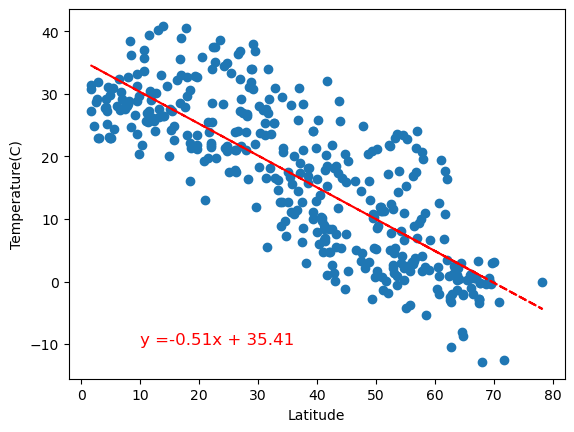

In [164]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.73


Text(0, 0.5, 'Temperature(C)')

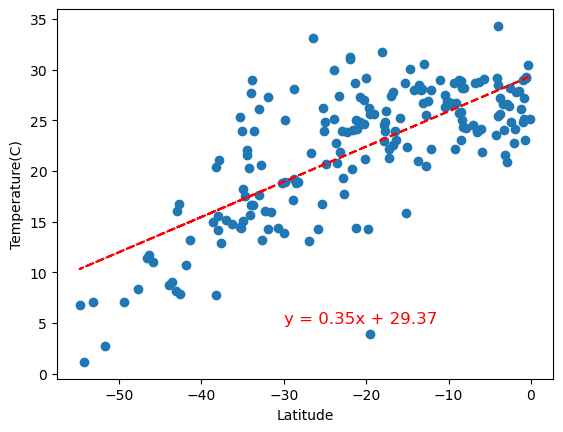

In [165]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:** In northern hemisphere, a city's latitude and temperature have a strong negative coorelation(-0.81) - that is to say the higher latitude of the city, the lower temperature the city would be. On the contrary, in southern hemisphere, a city's latitude and temperature have a fair positive coorelation(0.73) - that is to say the higher latitude of the city, the higher temperature the city would be.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.16


Text(0, 0.5, 'Humidity(%)')

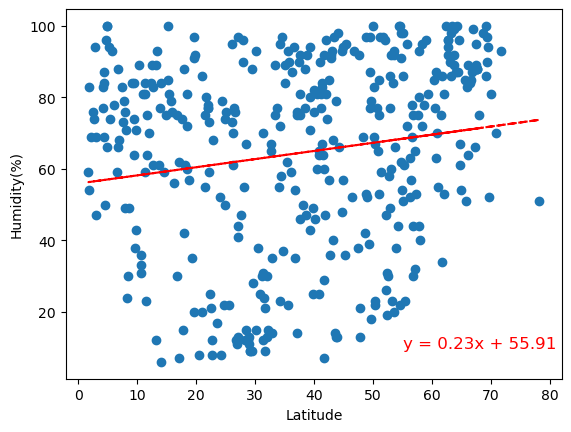

In [166]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.08


Text(0, 0.5, 'Humidity(%)')

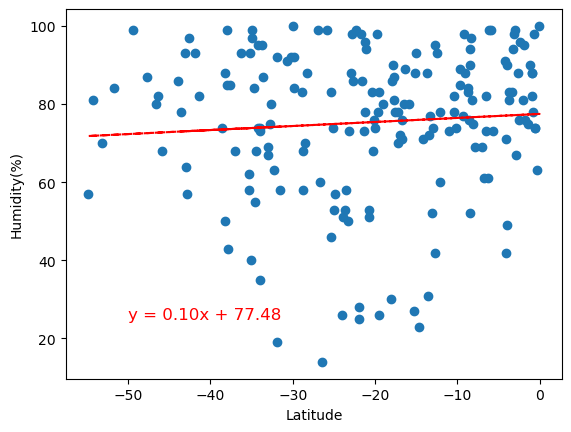

In [168]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** In northern hemisphere, a city's latitude and humidity have a weak positive coorelation(0.16) - that is to say with latitude increase, city's humidity is likely to increase but not much, in southern hemisphere, a city's latitude and humidity also have a weak positive coorelation(0.08) - that is to say with latitude increase, city's humidity is likely to increase but quick minimal.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.02


Text(0, 0.5, 'Cloudiness(%)')

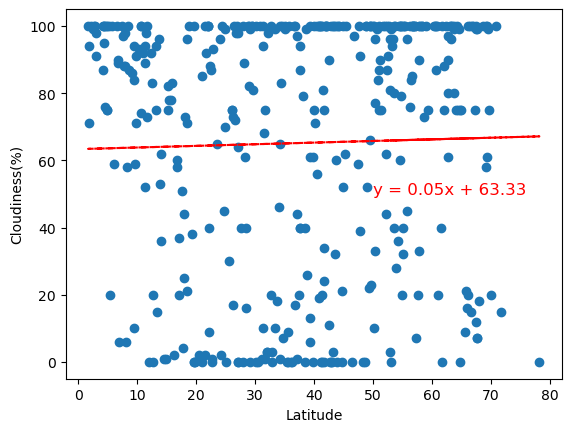

In [169]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is 0.17


Text(0, 0.5, 'Cloudiness(%)')

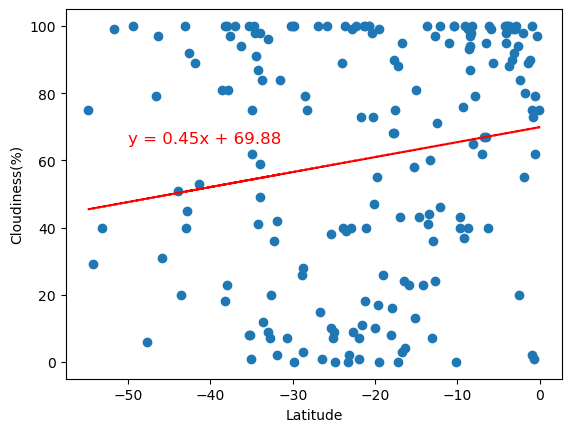

In [170]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** In northern hemisphere, a city's latitude and cloudiness level have almost no coorelation(0.02) - that is to say a city's cloudiness level does not much related to its latitude, in southern hemisphere, it is a similar situation with almost no coorelation(0.17) between city's latitude and cloudiness level.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is -0.02


Text(0, 0.5, 'Wind Speed(m/s)')

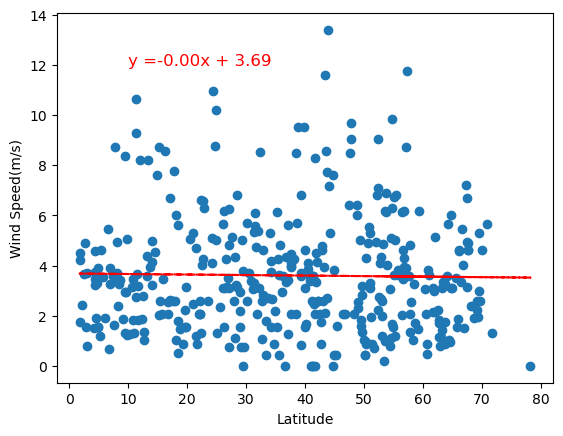

In [171]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.17


Text(0, 0.5, 'Wind Speed(m/s)')

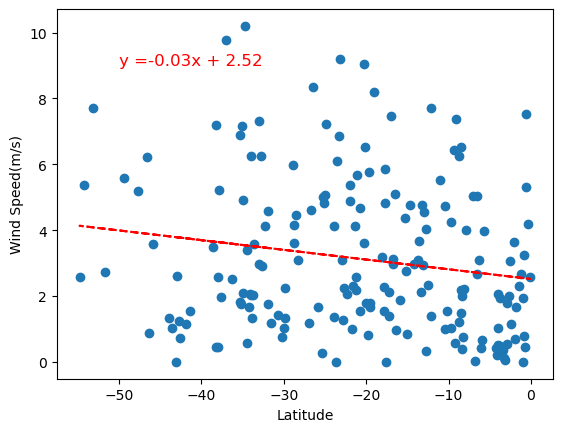

In [172]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** In northern hemisphere, a city's latitude and wind speed have no coorelation(0.00) - that is to say a city's windy level does not much related to its latitude, in southern hemisphere, it is a similar situation with very minor negative coorelation(-0.17) between city's latitude and wind speed.